In [1]:
from spotipy.oauth2 import SpotifyOAuth
import json
import spotipy
import time
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Authorization

In [4]:
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id="de31f3d0bec44126ab8346000d130097",
                                                           client_secret="239b820976cc46c98f5ed58295dd5909",
                                                           redirect_uri="http://localhost:3000",
                                                           scope="playlist-modify-public playlist-modify-private"))

### Audio features correlation for a playlist

In [5]:

playlist_id = '7dqwQWUt6WU2TQcoo6CN8N'

results = sp.playlist_tracks(playlist_id)
tracks = results['items']
track_ids = [track['track']['id'] for track in tracks]

SpotifyOauthError: error: invalid_client, error_description: Invalid client

In [5]:
focus_song_id = "6afspjTp6s1QucDHVKPDss"
sp.playlist_add_items(playlist_id, [f"spotify:track:{focus_song_id}"], position=0)

{'snapshot_id': 'AAAAQy2X3YJ4PFxo3Jj+BElgwKvhvWLm'}

In [8]:
sp.me()

{'display_name': 'Jess',
 'external_urls': {'spotify': 'https://open.spotify.com/user/22akuf64ickqxhlsnxeakvs3i'},
 'href': 'https://api.spotify.com/v1/users/22akuf64ickqxhlsnxeakvs3i',
 'id': '22akuf64ickqxhlsnxeakvs3i',
 'images': [{'url': 'https://i.scdn.co/image/ab67757000003b828fc74636772097ee329443ba',
   'height': 64,
   'width': 64},
  {'url': 'https://i.scdn.co/image/ab6775700000ee858fc74636772097ee329443ba',
   'height': 300,
   'width': 300}],
 'type': 'user',
 'uri': 'spotify:user:22akuf64ickqxhlsnxeakvs3i',
 'followers': {'href': None, 'total': 12}}

In [7]:
def show_tracks(results):
    for i, item in enumerate(results['items']):
        track = item['track']
        print(
            "   %d %32.32s %s" %
            (i, track['artists'][0]['name'], track['name']))



scope = 'playlist-read-private'
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope))

playlists = sp.current_user_playlists()
user_id = sp.me()['id']

for playlist in playlists['items']:
    if playlist['owner']['id'] == user_id:
        print()
        print(playlist['name'])
        print('  total tracks', playlist['tracks']['total'])

        tracks = sp.playlist_items(playlist['id'], fields="items,next", additional_types=('tracks', ))
        show_tracks(tracks)

        while tracks['next']:
            tracks = sp.next(tracks)
            show_tracks(tracks)

SpotifyOauthError: No client_id. Pass it or set a SPOTIPY_CLIENT_ID environment variable.

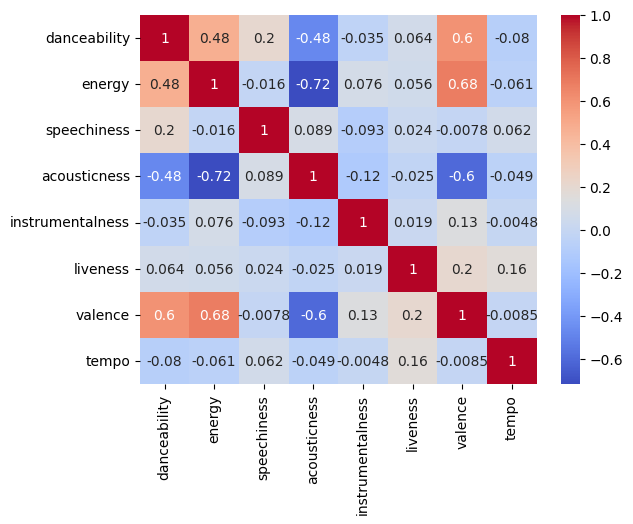

In [3]:
playlist_id = '7yKyeLJrUurzgpDI9rt4mF'

results = sp.playlist_tracks(playlist_id)
tracks = results['items']
track_ids = [track['track']['id'] for track in tracks]
audio_features = sp.audio_features(track_ids)

# Create a DataFrame of audio features
df = pd.DataFrame(audio_features)
df = df[['danceability', 'energy', 'speechiness', 'acousticness',
         'instrumentalness', 'liveness', 'valence', 'tempo']]

# Generate a correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

### Audio features for a track:

Todas las versiones de mí: 66RYGDQ1eQ8nlXxml2k5gC
Libertá: 6afspjTp6s1QucDHVKPDss

In [45]:
tid = '6afspjTp6s1QucDHVKPDss'
start = time.time()
features = sp.audio_features(tid)
delta = time.time() - start
print(json.dumps(features, indent=4))
print(f"features retrieved in {delta:.2f} seconds")

[
    {
        "danceability": 0.634,
        "energy": 0.582,
        "key": 8,
        "loudness": -6.742,
        "mode": 0,
        "speechiness": 0.0566,
        "acousticness": 0.622,
        "instrumentalness": 0.00075,
        "liveness": 0.155,
        "valence": 0.325,
        "tempo": 120.181,
        "type": "audio_features",
        "id": "6afspjTp6s1QucDHVKPDss",
        "uri": "spotify:track:6afspjTp6s1QucDHVKPDss",
        "track_href": "https://api.spotify.com/v1/tracks/6afspjTp6s1QucDHVKPDss",
        "analysis_url": "https://api.spotify.com/v1/audio-analysis/6afspjTp6s1QucDHVKPDss",
        "duration_ms": 172792,
        "time_signature": 4
    }
]
features retrieved in 0.29 seconds


### Audio analysis for a track:

In [46]:
start = time.time()
analysis = sp.audio_analysis(tid)
delta = time.time() - start
print(json.dumps(analysis, indent=4))
print(f"analysis retrieved in {delta:.2f} seconds")

{
    "meta": {
        "analyzer_version": "4.0.0",
        "platform": "Linux",
        "detailed_status": "OK",
        "status_code": 0,
        "timestamp": 1723200855,
        "analysis_time": 4.38059,
        "input_process": "libvorbisfile L+R 44100->22050"
    },
    "track": {
        "num_samples": 3810055,
        "duration": 172.79161,
        "sample_md5": "",
        "offset_seconds": 0,
        "window_seconds": 0,
        "analysis_sample_rate": 22050,
        "analysis_channels": 1,
        "end_of_fade_in": 0.0,
        "start_of_fade_out": 167.4507,
        "loudness": -6.742,
        "tempo": 120.181,
        "tempo_confidence": 0.706,
        "time_signature": 4,
        "time_signature_confidence": 0.897,
        "key": 8,
        "key_confidence": 0.737,
        "mode": 0,
        "mode_confidence": 0.689,
        "codestring": "eJxNmguSLKsNRLdSS-D_2f_GfE7S83wd4fsGuooCkUqlBGedNWbb5yvfWbes2-r41vg1Vjtfb-Wf1tzrn9bp7Z_WXf8-Wcs5_zZb_ffN2mv7dmttnctzdYzy7Xt3K222r8510rz

In [47]:
analysis.keys()

dict_keys(['meta', 'track', 'bars', 'beats', 'sections', 'segments', 'tatums'])

## Waveform

In [48]:
duration = analysis["track"]["duration"]
# All three features are normalized, so it varies from 0 to 1. Loudness is declared in decibles, so it is normalized between 0 and 35db, which is the overall distribution of decibel data on the platform
segments = [
    {
        'start': segment['start'] / duration,
        'duration': segment['duration'] / duration,
        'loudness': 1 - (min(max(segment['loudness_max'], -35), 0) / -35)
    }
    for segment in analysis['segments']
]

In [49]:

min_db = min(segment["loudness"] for segment in segments)
max_db = max(segment["loudness"] for segment in segments)

In [50]:
levels = []

i = 0.000
while i < 1:
    s = next(segment for segment in segments if i <= segment['start'] + segment['duration'])
    loudness = round((s['loudness'] / max_db) * 100) / 100
    levels.append(loudness)
    i += 0.001


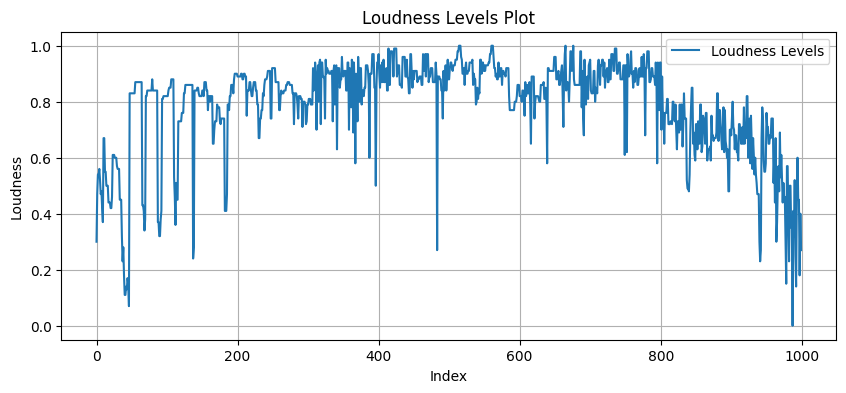

In [51]:
# Plotting the levels
plt.figure(figsize=(10, 4))
plt.plot(levels, label='Loudness Levels')
plt.xlabel('Index')
plt.ylabel('Loudness')
plt.title('Loudness Levels Plot')
plt.grid(True)
plt.legend()
plt.show()

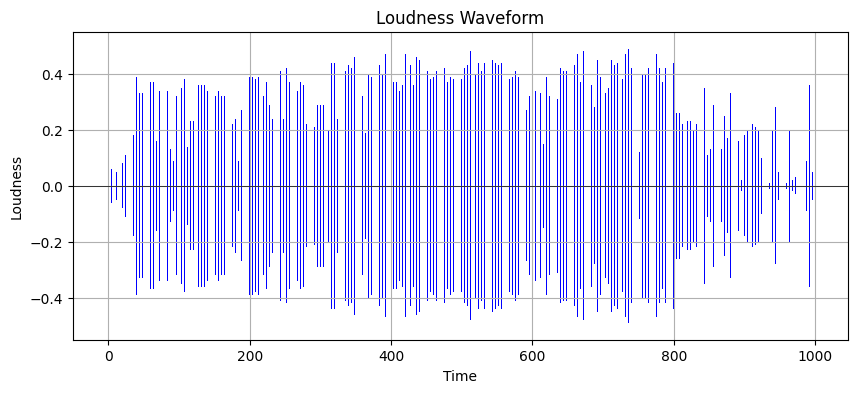

In [52]:
# Center the loudness values around zero (shift the range to -0.5 to 0.5)
levels = np.array(levels)
# Convert the list to a numpy array
loudness_array = np.array(levels)

# Center the loudness values around zero (shift the range to -0.5 to 0.5)
centered_loudness = loudness_array - 0.5

# Create the waveform data by plotting the values twice: one positive and one negative
waveform = np.concatenate([centered_loudness, -centered_loudness])

# Duplicate the x-axis values to match the waveform
x_values = np.arange(len(loudness_array))
x_waveform = np.concatenate([x_values, x_values])

# Choose the width of the bars
bar_width = 1  # Adjust this value as needed

# Downsampling factor (to reduce the number of bars)
downsample_factor = 4  # Adjust this value to change the density

# Downsample the data
x_waveform_downsampled = x_waveform[::downsample_factor]
waveform_downsampled = waveform[::downsample_factor]

# Plot the waveform as bars
plt.figure(figsize=(10, 4))
plt.bar(x_waveform_downsampled, waveform_downsampled, width=bar_width, color='blue')
plt.axhline(y=0, color='black', linewidth=0.5)  # Central line (x-axis)
plt.xlabel('Time')
plt.ylabel('Loudness')
plt.title('Loudness Waveform')
plt.grid(True)
plt.show()


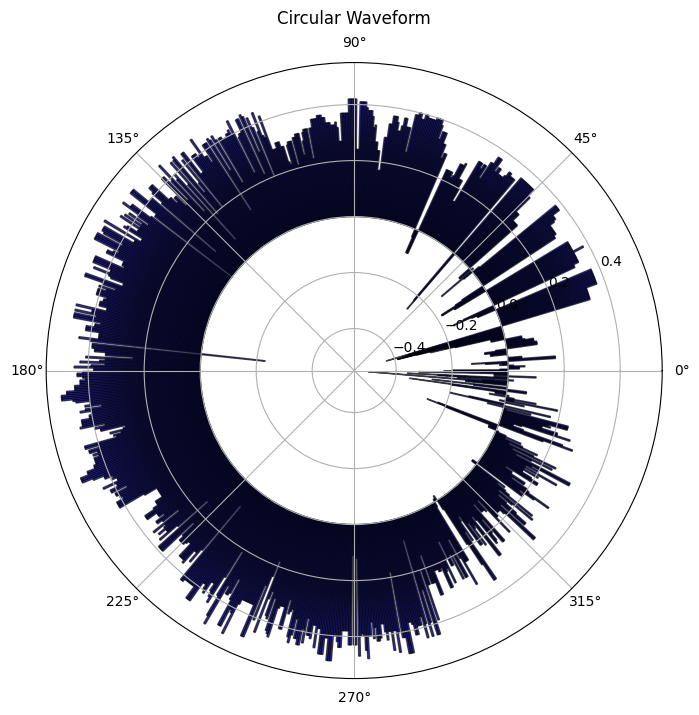

In [58]:
loudness_array = np.array(levels)


# Center the loudness values around zero (shift the range to -0.5 to 0.5)
centered_loudness = loudness_array - 0.5

# Number of bars
num_bars = len(centered_loudness)

# Angles for each bar (evenly spaced around the circle)
angles = np.linspace(0, 2 * np.pi, num_bars, endpoint=False).tolist()
angles += angles[:1]  # Repeat the first value to close the circle

# Loudness values (for bars)
bars = np.concatenate([centered_loudness, [centered_loudness[0]]])  # Repeat the first value to close the circle

# Create the polar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')

# Plot bars in polar coordinates
ax.bar(angles, bars, width=2 * np.pi / num_bars, color='blue', edgecolor='black', alpha=0.7)

# Add title
ax.set_title("Circular Waveform", va='bottom')

plt.show()